In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split


In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('submission.csv')

In [3]:
train.head()

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


In [10]:
for df in [train, test]:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['weekday'] = df['date'].dt.weekday

In [14]:
print("Kolom di train:", train.columns)
print("Kolom di test:", test.columns)


Kolom di train: Index(['ID', 'date', 'electricity_consumption', 'temperature_2m_max',
       'temperature_2m_min', 'apparent_temperature_max',
       'apparent_temperature_min', 'sunshine_duration', 'daylight_duration',
       'wind_speed_10m_max', 'wind_gusts_10m_max',
       'wind_direction_10m_dominant', 'shortwave_radiation_sum',
       'et0_fao_evapotranspiration', 'year', 'month', 'day', 'weekday',
       'cluster_id_cluster_1', 'cluster_id_cluster_2', 'cluster_id_cluster_3',
       'cluster_id_cluster_4'],
      dtype='object')
Kolom di test: Index(['ID', 'date', 'cluster_id', 'temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_max', 'apparent_temperature_min',
       'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'wind_direction_10m_dominant',
       'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'year',
       'month', 'day', 'weekday'],
      dtype='object')


In [15]:
for df in [train, test]:
    if 'cluster_id' in df.columns:
        df['cluster_id'] = df['cluster_id'].astype(str)
        df_dummy = pd.get_dummies(df['cluster_id'], prefix='cluster')
        df.drop(columns='cluster_id', inplace=True)
        df[df_dummy.columns] = df_dummy


In [16]:
missing_cols = set(train.columns) - set(test.columns) - {'electricity_consumption'}
for col in missing_cols:
    test[col] = 0
test = test[train.drop(columns=['electricity_consumption']).columns]

In [17]:
X = train.drop(columns=['ID', 'date', 'electricity_consumption'])
y = train['electricity_consumption']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 30.9630


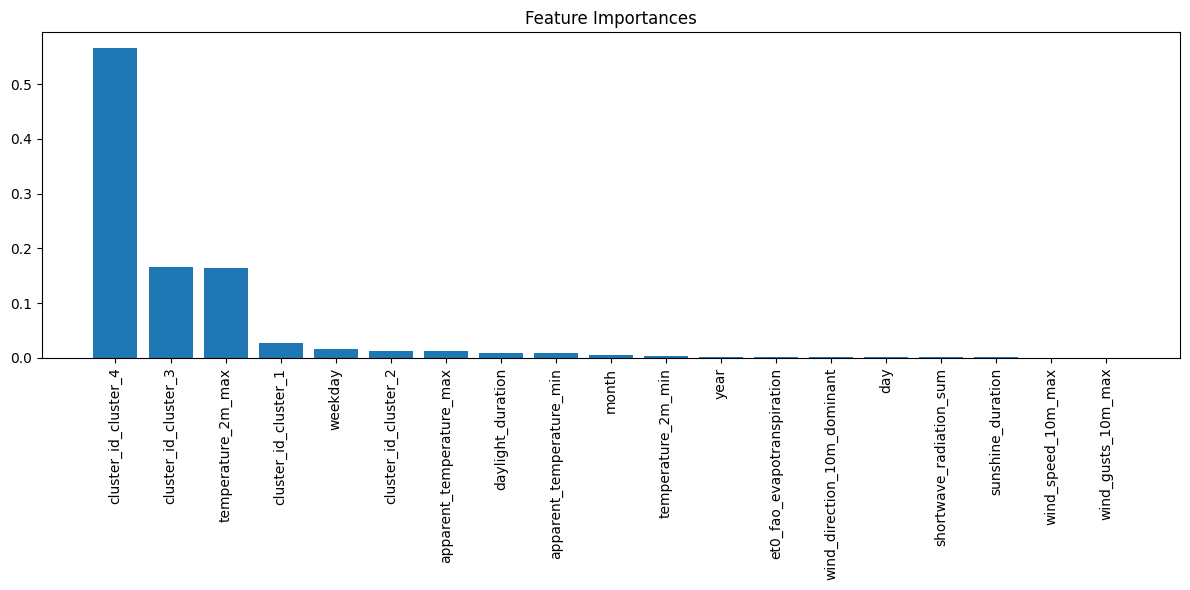

In [22]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [23]:
test_features = test.drop(columns=['ID', 'date'])
test_preds = model.predict(test_features)

In [24]:
submission = sample_submission.copy()
submission['electricity_consumption'] = test_preds
submission.to_csv("submission_fixed.csv", index=False)
print("Submission file created: submission_fixed.csv")

Submission file created: submission_fixed.csv
